In [403]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import (accuracy_score, confusion_matrix,
                             roc_curve, auc, roc_auc_score, ConfusionMatrixDisplay,
                             f1_score, recall_score,
                             precision_score, precision_recall_curve,
                             average_precision_score, classification_report)

from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

In [100]:
df = pd.read_csv(r"C:\Users\ASUS\Downloads\logistic_regression.csv")

In [102]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [104]:
df.shape

(396030, 27)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [6]:
df.describe(include = "object").T

,count,unique,top,freq
term,396030,2,36 months,302005
grade,396030,7,B,116018
sub_grade,396030,35,B3,26655
emp_title,373103,173105,Teacher,4389
emp_length,377729,11,10+ years,126041
home_ownership,396030,6,MORTGAGE,198348
verification_status,396030,3,Verified,139563
issue_d,396030,115,Oct-2014,14846
loan_status,396030,2,Fully Paid,318357
purpose,396030,14,debt_consolidation,234507


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


In [8]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

### Column Profiling: 
1. loan_amnt: Amount borrower applied for.
2. term: Loan duration (36 or 60 months).
3. int_rate: Interest rate on loan.
4. installment: Monthly repayment amount.
5. grade: LoanTap assigned loan grade (Risk ratings by LoanTap.)
6. sub_grade: LoanTap assigned loan grade (Risk ratings by LoanTap.)
7. emp_title: Borrower's job title.
8. emp_length: Duration of borrower's employment (0-10 years).
9. home_ownership: Borrower's housing situation (own, rent, etc.).
10. annual_inc: Borrower's yearly income.
11. verification_status: Whether borrower's income was verified.
12. issue_d: Loan issuance month.
13. loan_status: Current status of the loan.
14. purpose: Borrower's reason for the loan.
15. title: The loan's title provided by the borrower.
16. dti (Debt-to-Income ratio): Monthly debt vs. monthly income ratio.
17. earliest_cr_line: Date of borrower's oldest credit account.
18. open_acc: Number of borrower's active credit lines.
19. pub_rec: Negative records on borrower's public credit profile.
20. revol_bal: Total credit balance.
21. revol_util: Usage percentage of 'revolving' accounts like credit cards.
22. total_acc: Total number of borrower's credit lines.
23. initial_list_status: Loan's first category ('W' or 'F').
24. application_type: Individual or joint application.
25. mort_acc: Number of borrower's mortgages.
26. pub_rec_bankruptcies: Bankruptcy records for borrower.
27. Address: Borrower's location.

In [10]:
df.duplicated().sum()

0

In [11]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [12]:
df_num = df.select_dtypes('float64').columns.tolist()
df_num

['loan_amnt',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'mort_acc',
 'pub_rec_bankruptcies']

### Univariate Analysis:

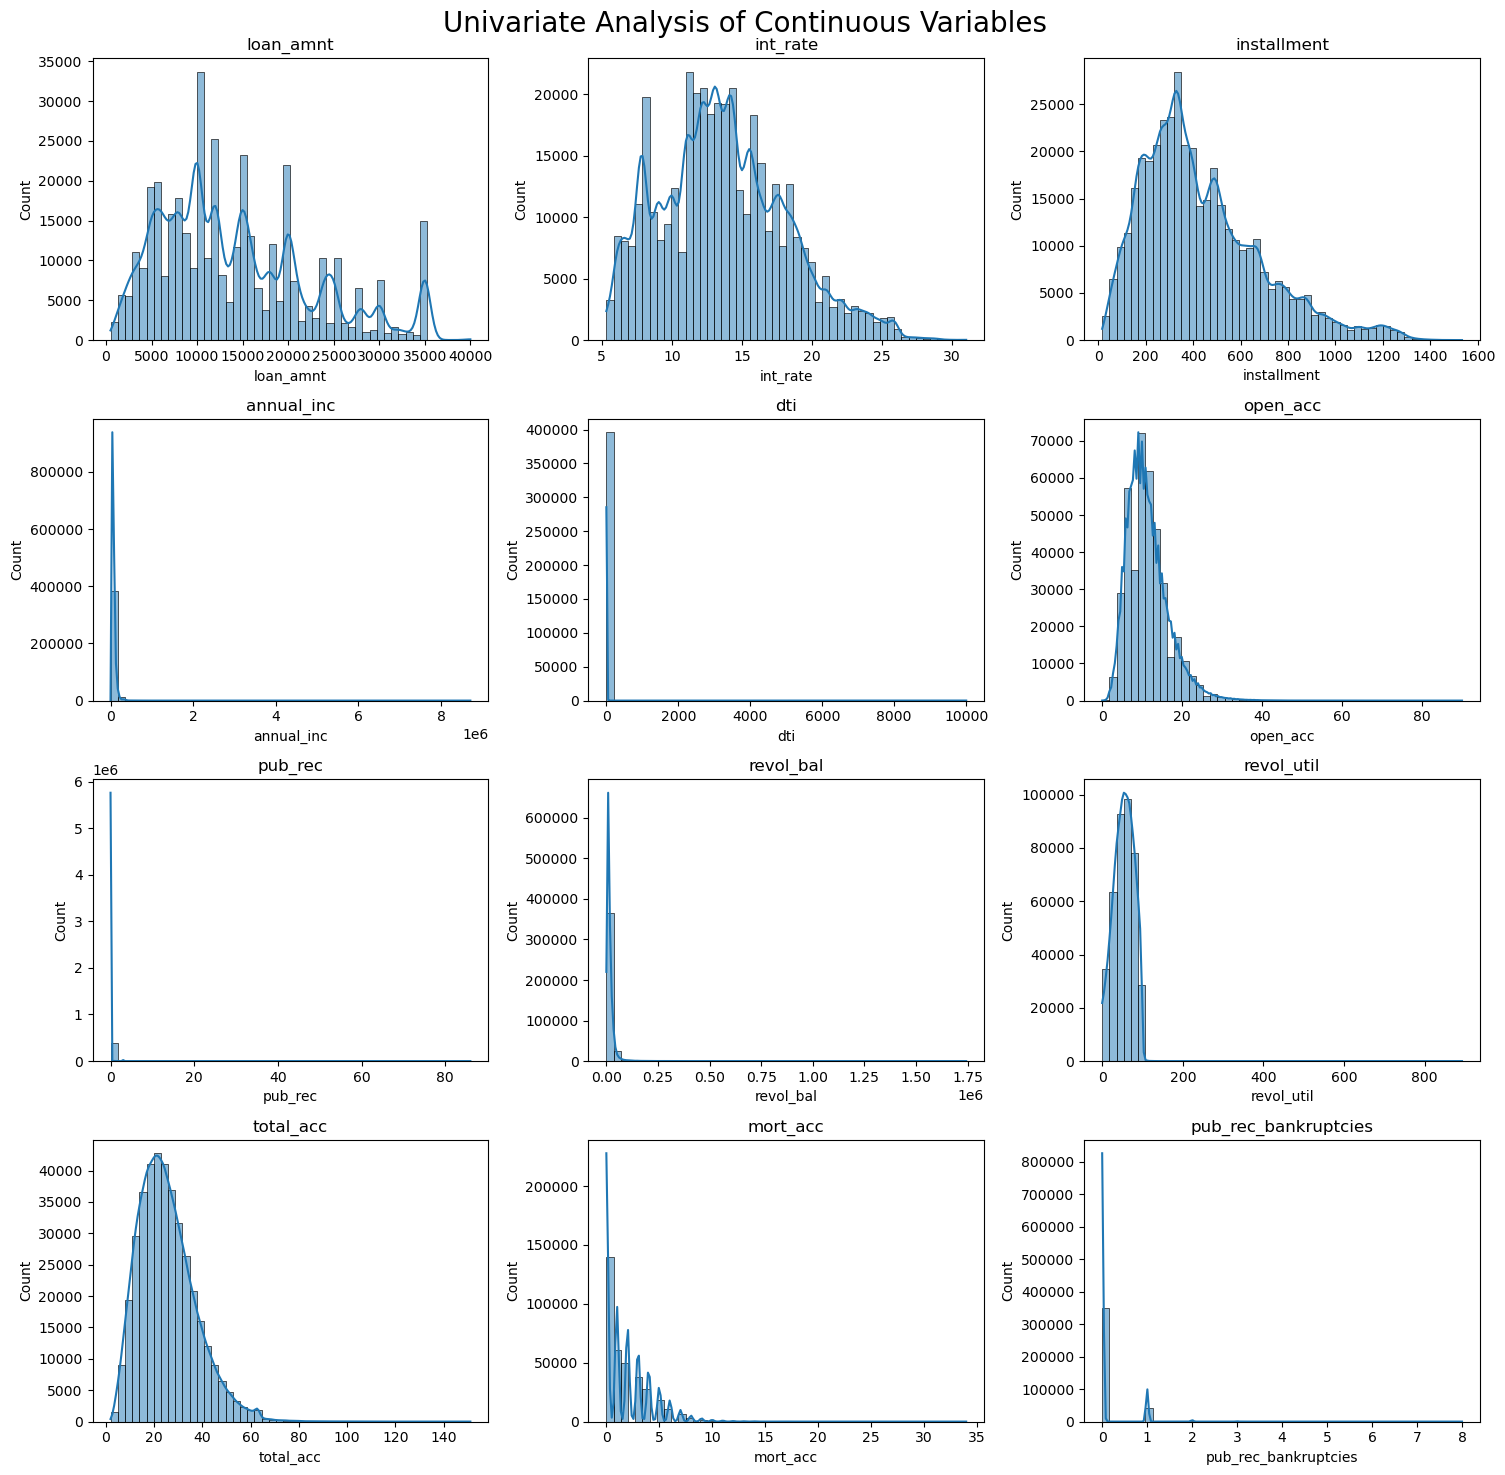

In [14]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))
axs = axs.flatten()  # Flatten the 2D array of axes to 1D

# Plot histograms
for i, col in enumerate(df_num):
    sns.histplot(df[col], kde=True, ax=axs[i], bins=50)
    axs[i].set_title(col)

# for Removing empty subplots
for j in range(len(df_num), len(axs)):
    fig.delaxes(axs[j])

plt.suptitle("Univariate Analysis of Continuous Variables", fontsize=20)
plt.tight_layout()
plt.show()

### Insights:
 - All the features are having skewedness in distirbution
 - Almost all numeric features has outliers in it


In [16]:
df_cat = df.select_dtypes('object').columns.tolist()
df_cat

['term',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'title',
 'earliest_cr_line',
 'initial_list_status',
 'application_type',
 'address']

In [17]:
df_cat_temp = []
for i in df_cat:
    if df[i].nunique() < 40:
        df_cat_temp.append(i)

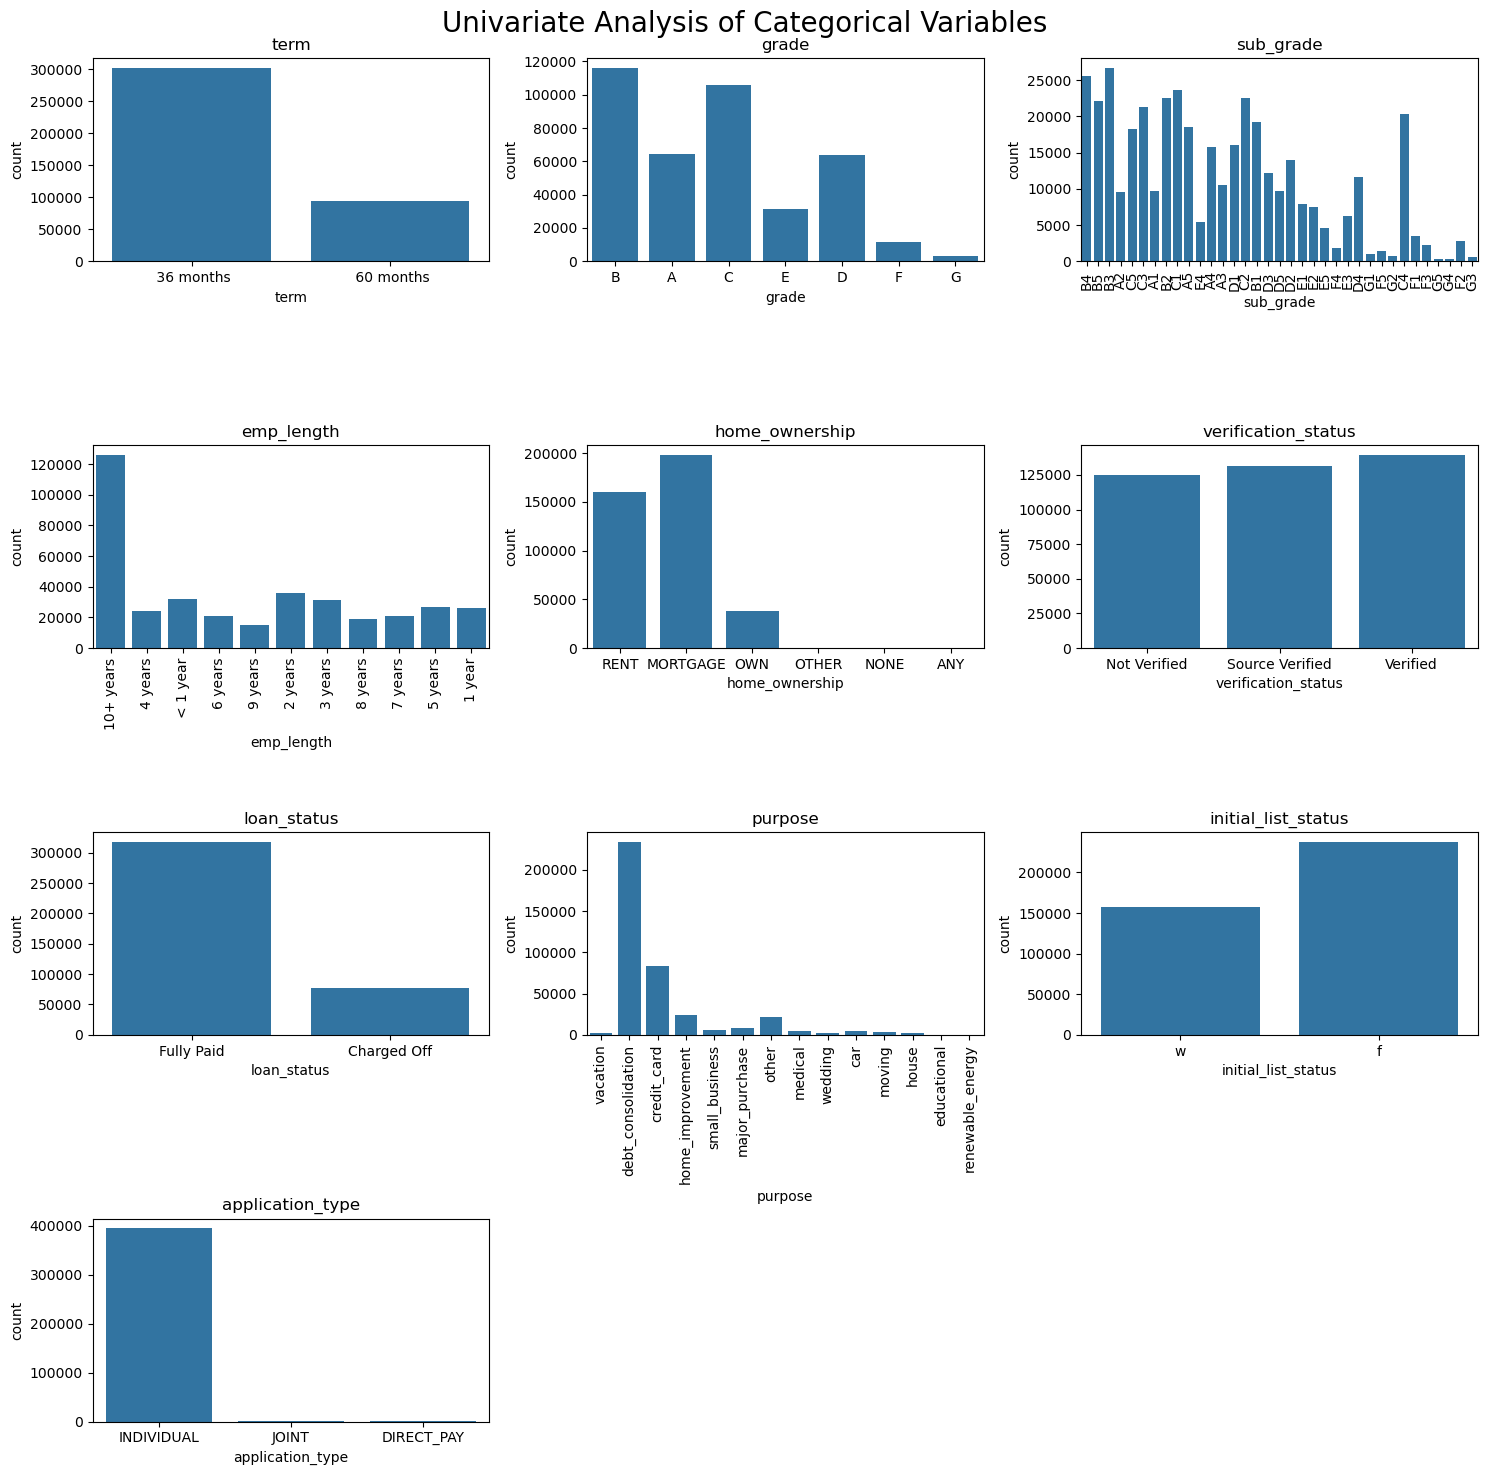

In [18]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))
axs = axs.flatten()  # Flatten the 2D array of axes to 1D

# Plot histograms
for i, col in enumerate(df_cat_temp):
    sns.countplot(x=df[col], ax=axs[i])
    axs[i].set_title(col)
    if df[col].nunique() > 10:
        axs[i].tick_params(axis='x', rotation=90)
    else:
        pass
    
    

# for Removing empty subplots
for j in range(len(df_cat_temp), len(axs)):
    fig.delaxes(axs[j])

plt.suptitle("Univariate Analysis of Categorical Variables", fontsize=20)
plt.tight_layout()
plt.show()

### Insights

- All the application type is Individual
- Most of the loan tenure is disbursed for 36 months
- The grade of majority of people those who have took the loan is 'B' and have subgrade 'B3'.
- So from that we can infer that people with grade 'B' and subgrade 'B3' are more likely to fully pay the loan.

### Bi-Variate Analysis

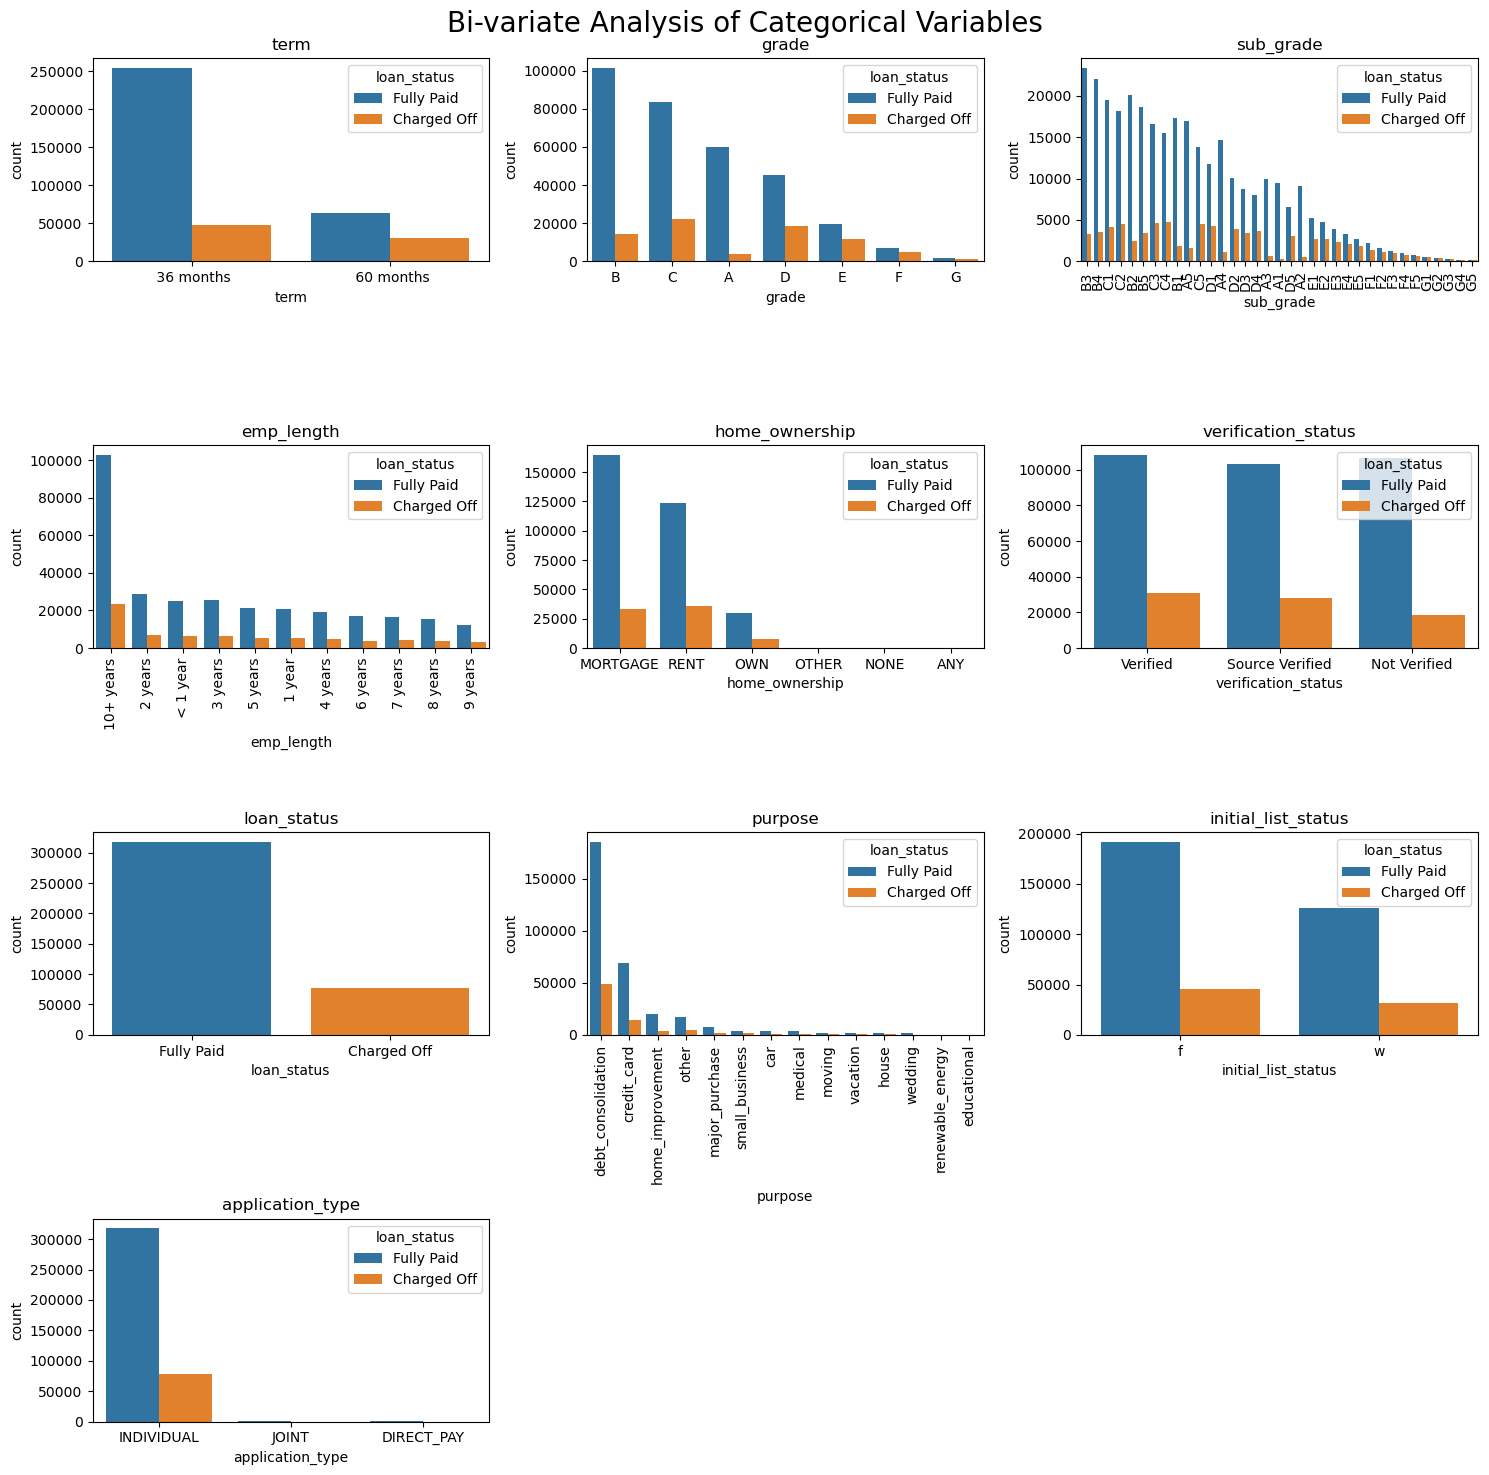

In [21]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))
axs = axs.flatten()  # Flatten the 2D array of axes to 1D

# Plot histograms
for i, col in enumerate(df_cat_temp):
    category_counts = df[col].value_counts().sort_values(ascending=False)
    sorted_categories = category_counts.index
    sns.countplot(x=df[col], data= df, ax=axs[i], hue= "loan_status", order=sorted_categories)
    axs[i].set_title(col)
    if df[col].nunique() > 10:
        axs[i].tick_params(axis='x', rotation=90)
    else:
        pass
    
    

# for Removing empty subplots
for j in range(len(df_cat_temp), len(axs)):
    fig.delaxes(axs[j])

plt.suptitle("Bi-variate Analysis of Categorical Variables", fontsize=20)
plt.tight_layout()
plt.show()

### Insights

- Most of the people took loan for 36 months and full paid on time
- By this plot it seems grade F and G didn't pay off the amount often
- The majority of home ownership as mortgage and rent
- Most of the people took loan for debt consolidations


### Corelation Heatmap:

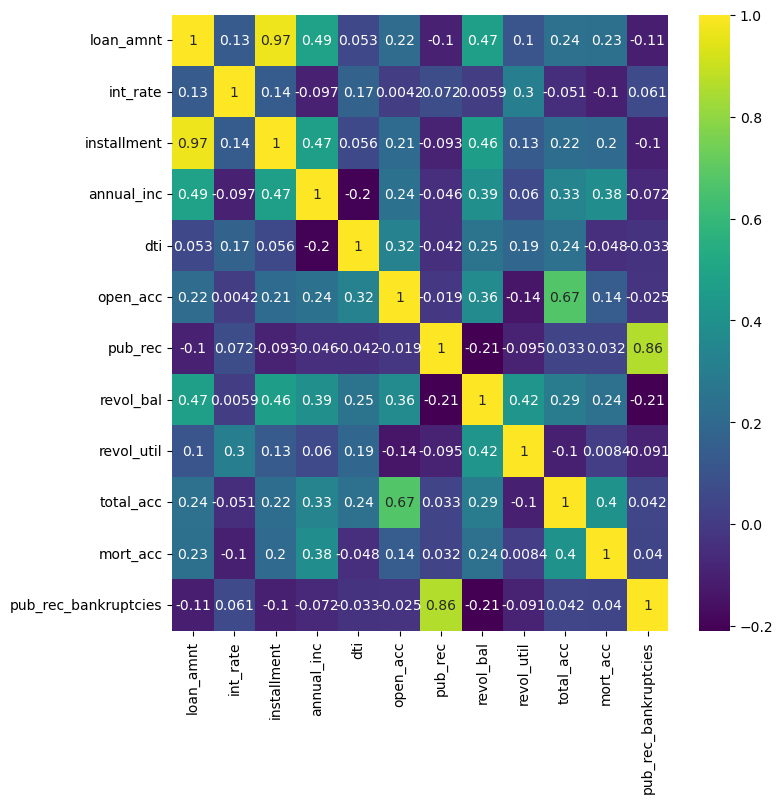

In [24]:
plt.figure(figsize=(8,8))
sns.heatmap(df.select_dtypes('float64').corr(method='spearman'),annot=True,cmap='viridis')
plt.show()

### Insight:
We noticed almost perfect correlation between "loan_amnt" the "installment" feature.

- Installment: The monthly payment owed by the borrower if the loan originates.
- Loan_amnt: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

So, we can drop either one of those columns.

In [108]:
df.drop(columns=['installment'],axis=1,inplace=True)

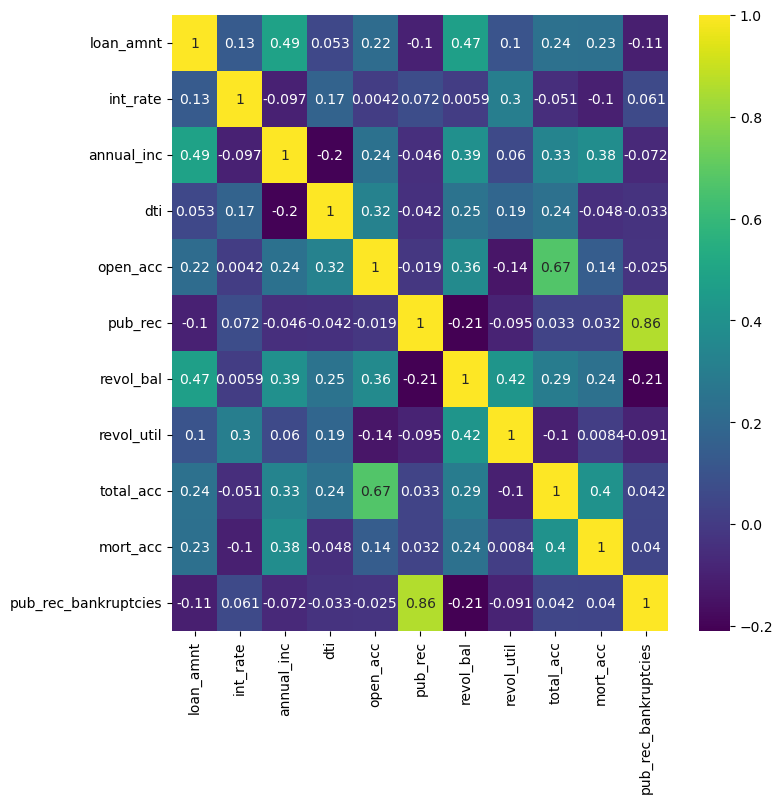

In [110]:
plt.figure(figsize=(8,8))
sns.heatmap(df.select_dtypes('float64').corr(method='spearman'),annot=True,cmap='viridis')
plt.show()

### Data - Preprocessing:  

In [112]:
def pub_rec(number):
    if number == 0.0:
        return 0
    else:
        return 1
    
def mort_acc(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number
    
def pub_rec_bankruptcies(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number

In [114]:
df['pub_rec'] = df.pub_rec.apply(pub_rec)
df['mort_acc'] = df.mort_acc.apply(mort_acc)
df['pub_rec_bankruptcies'] = df.pub_rec_bankruptcies.apply(pub_rec_bankruptcies)

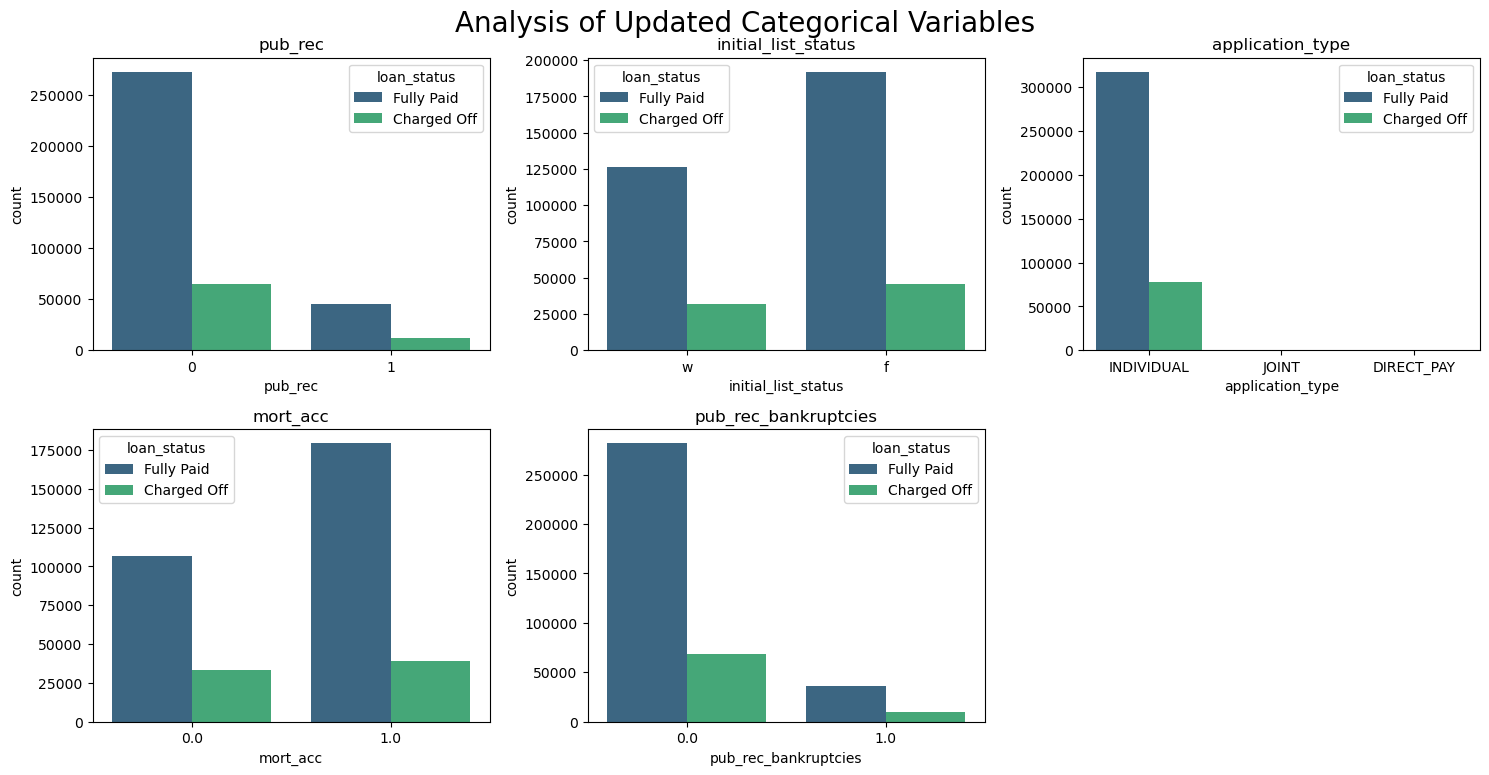

In [116]:
df_temp = ['pub_rec', 'initial_list_status', 'application_type', 'mort_acc', 'pub_rec_bankruptcies']

# Create subplots
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))
axs = axs.flatten()  # Flatten the 2D array of axes to 1D

# Plot count plots
for i, col in enumerate(df_temp):
    sns.countplot(x=df[col], data=df, ax=axs[i], hue='loan_status', palette='viridis')
    axs[i].set_title(col)

# Remove empty subplots if there are more axes than columns
for j in range(len(df_temp), len(axs)):
    fig.delaxes(axs[j])

plt.suptitle("Analysis of Updated Categorical Variables", fontsize=20)
plt.tight_layout()
plt.show()

### Insights

- Majority of the loan disbursed to the people whose do not hold bankrupties record have successfully paid loan

## Missing Value Treatment

In [118]:
# Missing values
for column in df.columns:
    if df[column].isna().sum() != 0:
        missing = df[column].isna().sum()
        portion = (missing / df.shape[0]) * 100
        print(f"'{column}': number of missing values '{missing}' ==> '{portion:.3f}%'")

'emp_title': number of missing values '22927' ==> '5.789%'
'emp_length': number of missing values '18301' ==> '4.621%'
'title': number of missing values '1756' ==> '0.443%'
'revol_util': number of missing values '276' ==> '0.070%'
'mort_acc': number of missing values '37795' ==> '9.543%'
'pub_rec_bankruptcies': number of missing values '535' ==> '0.135%'


In [128]:
avg_mort = df.groupby('total_acc')['mort_acc'].mean()

In [130]:
def fill_mort(total_acc, mort_acc):
  if np.isnan(mort_acc):
    return avg_mort[total_acc].round()
  else:
    return mort_acc

In [132]:
df['mort_acc'] = df.apply(lambda x: fill_mort(x['total_acc'],x['mort_acc']), axis=1)

In [133]:
# Missing values
for column in df.columns:
    if df[column].isna().sum() != 0:
        missing = df[column].isna().sum()
        portion = (missing / df.shape[0]) * 100
        print(f"'{column}': number of missing values '{missing}' ==> '{portion:.3f}%'")

'emp_title': number of missing values '22927' ==> '5.789%'
'emp_length': number of missing values '18301' ==> '4.621%'
'title': number of missing values '1756' ==> '0.443%'
'revol_util': number of missing values '276' ==> '0.070%'
'pub_rec_bankruptcies': number of missing values '535' ==> '0.135%'


In [136]:
#Filling missing values with 'Unknown' for object dtype
fill_values = {'title': 'Unknown', 'emp_title': 'Unknown'}
df.fillna(value=fill_values, inplace=True)

In [40]:
df.isnull().sum()/len(df)*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               0.000000
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.000000
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                0.000000
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

In [138]:
# Missing values
for column in df.columns:
    if df[column].isna().sum() != 0:
        missing = df[column].isna().sum()
        portion = (missing / df.shape[0]) * 100
        print(f"'{column}': number of missing values '{missing}' ==> '{portion:.3f}%'")

'emp_length': number of missing values '18301' ==> '4.621%'
'revol_util': number of missing values '276' ==> '0.070%'
'pub_rec_bankruptcies': number of missing values '535' ==> '0.135%'


In [140]:
df.emp_title.nunique()

173106

Realistically there are too many unique job titles to try to convert this to a dummy variable feature. Let's remove that emp_title column.

In [143]:
df.drop('emp_title', axis=1, inplace=True)

In [145]:
df.emp_length.unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

In [147]:
for year in df.emp_length.unique():
    print(f"{year} years in this position:")
    print(f"{df[df.emp_length == year].loan_status.value_counts(normalize=True)}")
    print()

10+ years years in this position:
loan_status
Fully Paid     0.815814
Charged Off    0.184186
Name: proportion, dtype: float64

4 years years in this position:
loan_status
Fully Paid     0.807615
Charged Off    0.192385
Name: proportion, dtype: float64

< 1 year years in this position:
loan_status
Fully Paid     0.793128
Charged Off    0.206872
Name: proportion, dtype: float64

6 years years in this position:
loan_status
Fully Paid     0.810806
Charged Off    0.189194
Name: proportion, dtype: float64

9 years years in this position:
loan_status
Fully Paid     0.79953
Charged Off    0.20047
Name: proportion, dtype: float64

2 years years in this position:
loan_status
Fully Paid     0.806738
Charged Off    0.193262
Name: proportion, dtype: float64

3 years years in this position:
loan_status
Fully Paid     0.804769
Charged Off    0.195231
Name: proportion, dtype: float64

8 years years in this position:
loan_status
Fully Paid     0.80024
Charged Off    0.19976
Name: proportion, dtype: fl

Charge off rates are extremely similar across all employment lengths. So we are going to drop the emp_length column.

In [149]:
df.drop('emp_length', axis=1, inplace=True)

In [151]:
# Missing values
for column in df.columns:
    if df[column].isna().sum() != 0:
        missing = df[column].isna().sum()
        portion = (missing / df.shape[0]) * 100
        print(f"'{column}': number of missing values '{missing}' ==> '{portion:.3f}%'")

'revol_util': number of missing values '276' ==> '0.070%'
'pub_rec_bankruptcies': number of missing values '535' ==> '0.135%'


revol_util & pub_rec_bankruptcies

These two features have missing data points, but they account for less than 0.5% of the total data. So we are going to remove the rows that are missing those values in those columns.

In [153]:
df.dropna(inplace=True)

In [155]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

## Outlier Detection and treatment:

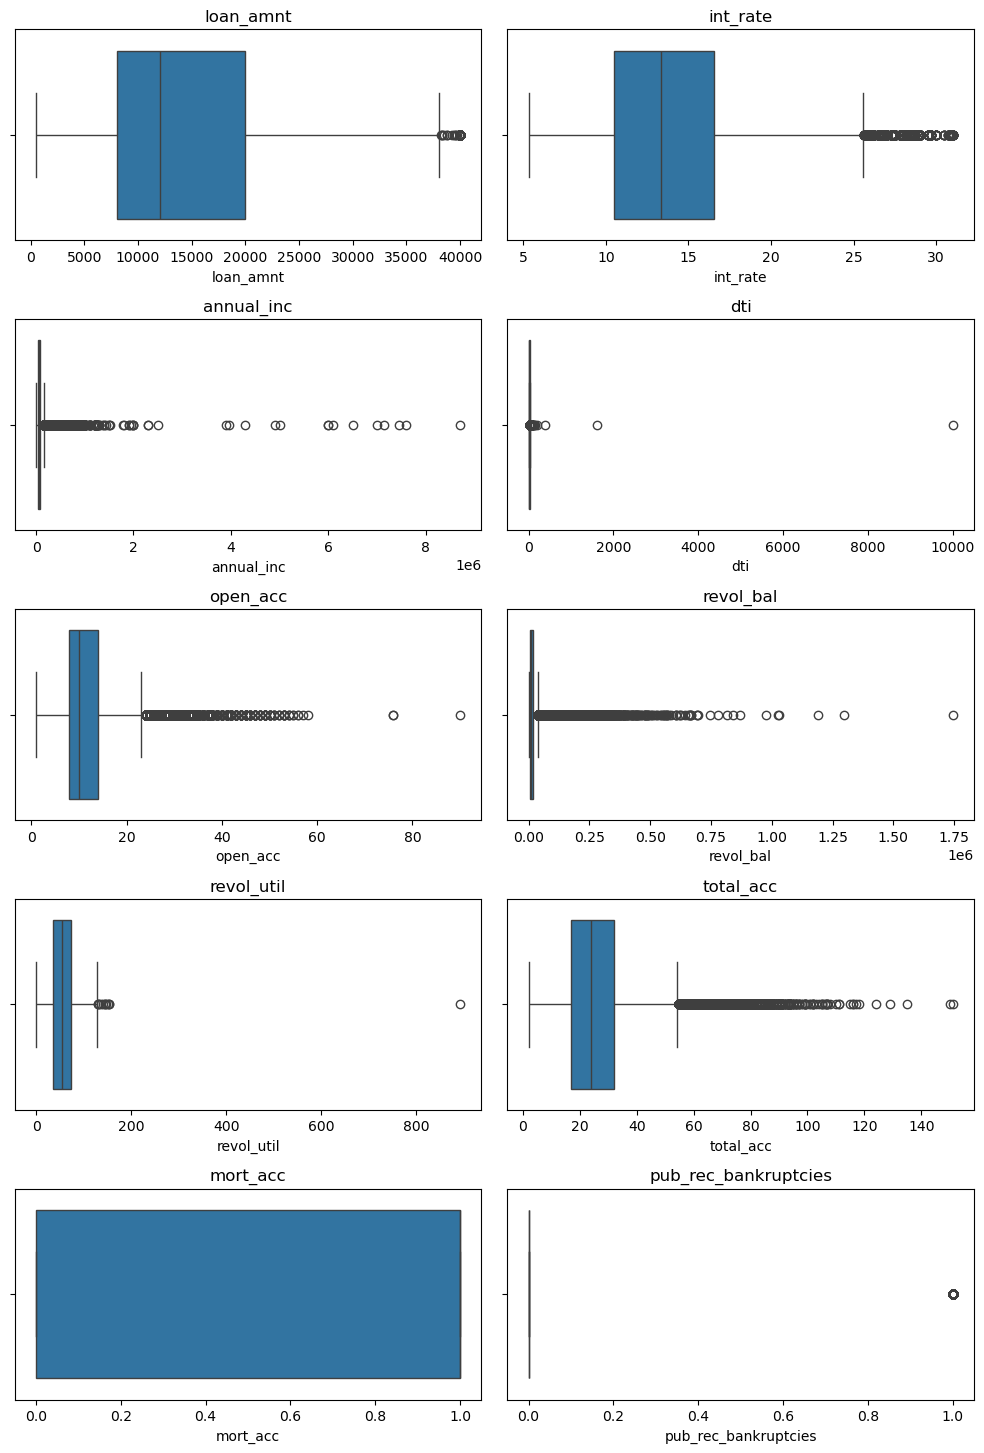

In [157]:
df_num = df.select_dtypes('float64').columns.tolist()
fig = plt.figure(figsize=(10,20))
i=1
for col in df_num:
    ax = plt.subplot(7,2,i)
    sns.boxplot(x=df[col])
    plt.title(col)
    i += 1

plt.tight_layout()
plt.show()

### Treatment:

In [158]:
for col in df_num:
    mean=df[col].mean()
    std=df[col].std()
    
    upper_limit=mean+3*std
    lower_limit=mean-3*std
    
    df=df[(df[col]<upper_limit) & (df[col]>lower_limit)]
    
df.shape

(378196, 24)

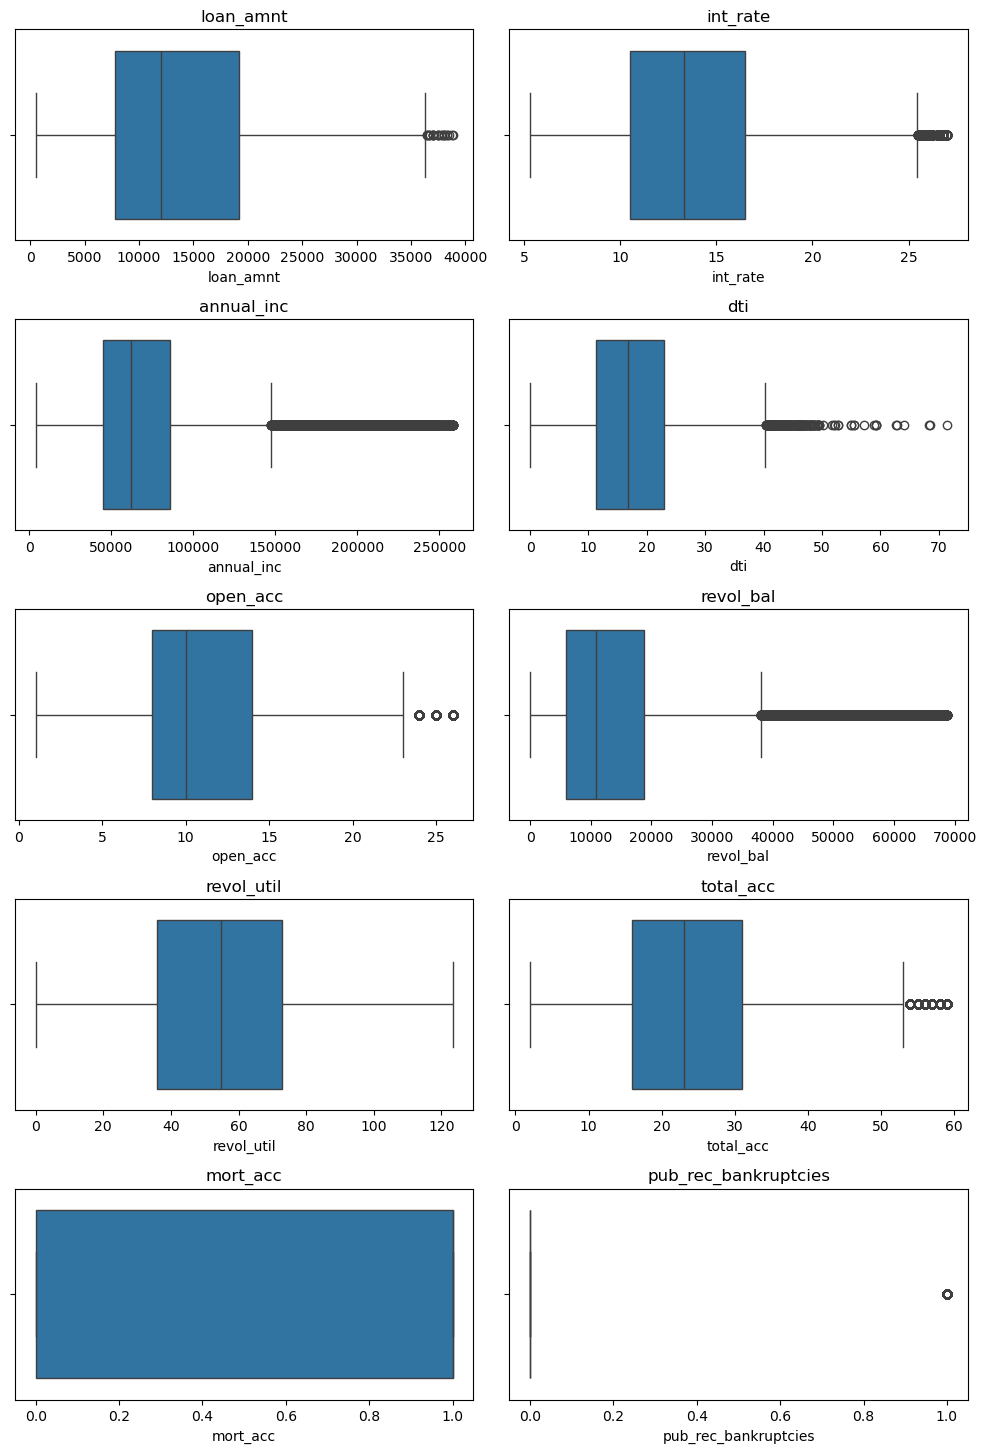

In [161]:
df_num = df.select_dtypes('float64').columns.tolist()
fig = plt.figure(figsize=(10,20))
i=1
for col in df_num:
    ax = plt.subplot(7,2,i)
    sns.boxplot(x=df[col])
    plt.title(col)
    i += 1

plt.tight_layout()
plt.show()

In [163]:
# Converting term values to numerical val
term_values={' 36 months': 36, ' 60 months':60}
df['term'] = df.term.map(term_values)

# Mapping the target variable
df['loan_status']=df.loan_status.map({'Fully Paid':1, 'Charged Off':0})

# Initial List Status
df['initial_list_status'].unique()
np.array(['w', 'f'], dtype=object)
list_status = {'w': 0, 'f': 1}
df['initial_list_status'] = df.initial_list_status.map(list_status)

# Let's fetch ZIP from address and then drop the remaining details -
df['zip_code'] = df.address.apply(lambda x: x[-5:])

In [165]:
df['zip_code'].value_counts(normalize=True)*100

zip_code
70466    14.394653
30723    14.280690
22690    14.274609
48052    14.119398
00813    11.553533
29597    11.479497
05113    11.454643
11650     2.837682
93700     2.825255
86630     2.780040
Name: proportion, dtype: float64

In [167]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'grade', 'sub_grade', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'zip_code'],
      dtype='object')

### Dropping unwantd features:

In [169]:

df.drop(columns=['issue_d', 'title', 'sub_grade', 'address', 'earliest_cr_line'], 
                   axis=1, inplace=True)

In [171]:
df.shape

(378196, 20)

## One-hot Encoding

In [173]:
dummies=['purpose', 'zip_code', 'grade', 'verification_status', 'application_type', 'home_ownership']
df=pd.get_dummies(df, columns=dummies, drop_first=True)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [175]:
df.head()

,loan_amnt,term,int_rate,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,mort_acc,pub_rec_bankruptcies,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,zip_code_05113,zip_code_11650,zip_code_22690,zip_code_29597,zip_code_30723,zip_code_48052,zip_code_70466,zip_code_86630,zip_code_93700,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,10000.0,36,11.44,117000.0,1,26.24,16.0,0,36369.0,41.8,25.0,0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True
1,8000.0,36,11.99,65000.0,1,22.05,17.0,0,20131.0,53.3,27.0,1,1.0,0.0,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False
2,15600.0,36,10.49,43057.0,1,12.79,13.0,0,11987.0,92.2,26.0,1,0.0,0.0,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,True
3,7200.0,36,6.49,54000.0,1,2.60,6.0,0,5472.0,21.5,13.0,1,0.0,0.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True
4,24375.0,60,17.27,55000.0,0,33.95,13.0,0,24584.0,69.8,43.0,1,1.0,0.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,True,False,False,False,False


In [88]:
df.shape

(378196, 51)

In [193]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'annual_inc', 'loan_status', 'dti',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'mort_acc', 'pub_rec_bankruptcies',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'zip_code_05113',
       'zip_code_11650', 'zip_code_22690', 'zip_code_29597', 'zip_code_30723',
       'zip_code_48052', 'zip_code_70466', 'zip_code_86630', 'zip_code_93700',
       'grade_B', 'grade_C', 'grade_D', 'grade_E', 'grade_F', 'grade_G',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'hom

## Creating Independent and Dependent Features

In [205]:
X = df.drop('loan_status',axis=1)
y = df['loan_status']

In [267]:
X.head()

,loan_amnt,term,int_rate,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,mort_acc,pub_rec_bankruptcies,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,zip_code_05113,zip_code_11650,zip_code_22690,zip_code_29597,zip_code_30723,zip_code_48052,zip_code_70466,zip_code_86630,zip_code_93700,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,10000.0,36,11.44,117000.0,26.24,16.0,0,36369.0,41.8,25.0,0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True
1,8000.0,36,11.99,65000.0,22.05,17.0,0,20131.0,53.3,27.0,1,1.0,0.0,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False
2,15600.0,36,10.49,43057.0,12.79,13.0,0,11987.0,92.2,26.0,1,0.0,0.0,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,True
3,7200.0,36,6.49,54000.0,2.60,6.0,0,5472.0,21.5,13.0,1,0.0,0.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True
4,24375.0,60,17.27,55000.0,33.95,13.0,0,24584.0,69.8,43.0,1,1.0,0.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,True,False,False,False,False


### Train-Test-Split

In [313]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(302556, 50)
(75640, 50)
(302556,)
(75640,)


In [315]:
X_train.head()

,loan_amnt,term,int_rate,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,mort_acc,pub_rec_bankruptcies,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,zip_code_05113,zip_code_11650,zip_code_22690,zip_code_29597,zip_code_30723,zip_code_48052,zip_code_70466,zip_code_86630,zip_code_93700,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
143800,15000.0,60,13.67,130000.0,7.14,10.0,1,3141.0,37.0,15.0,1,1.0,1.0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False
255634,18000.0,60,11.55,90000.0,12.28,15.0,0,19387.0,55.4,40.0,1,1.0,0.0,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False,True,False,False,False,False
192677,10000.0,36,14.09,43000.0,22.88,13.0,0,9926.0,64.0,21.0,1,0.0,0.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True
98631,35000.0,60,24.99,110000.0,45.76,13.0,0,9529.0,55.4,21.0,0,0.0,0.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False
167192,19700.0,60,17.27,55000.0,11.96,6.0,1,12579.0,66.9,17.0,1,1.0,1.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,True,False,False,False,False


In [317]:
print("Shape of X-train: ", X_train.shape)
print("Shape of X-test: ", X_test.shape)

Shape of X-train:  (302556, 50)
Shape of X-test:  (75640, 50)


### Standardization

In [324]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

## Logistic Regression

### Model 1

In [331]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [333]:
y_pred = model.predict(X_test)
X_preds = model.predict(X_train)
print("Accuracy score: ", model.score(X_test, y_test)*100)

Accuracy score:  88.84320465362242


In [335]:
y_pred = model.predict(X_test)
proba = model.predict_proba(X_test)[:,1]
proba

array([0.90948871, 0.76320385, 0.95616356, ..., 0.99999993, 0.44064353,
       0.8444051 ])

Accuracy of the Training dataset : 0.88918084585994
Accuracy of the Test dataset : 0.8884320465362242
Accuracy Score :  0.8884320465362242 



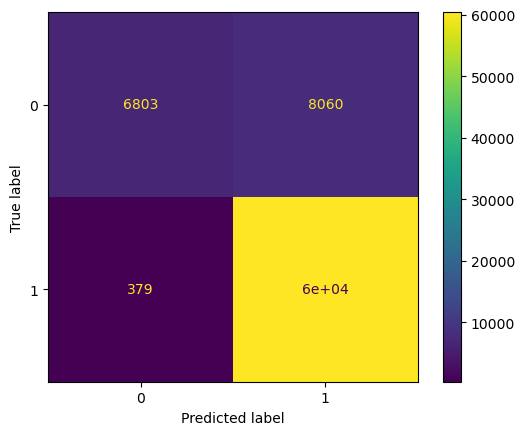

In [337]:
print('Accuracy of the Training dataset :',model.score(X_train,y_train))
print('Accuracy of the Test dataset :',model.score(X_test,y_test))
print('Accuracy Score : ',accuracy_score(y_test,y_pred),'\n')
cm1 = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=model.classes_)
disp.plot()
plt.show()

In [339]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.46      0.62     14863
           1       0.88      0.99      0.93     60777

    accuracy                           0.89     75640
   macro avg       0.91      0.73      0.78     75640
weighted avg       0.90      0.89      0.87     75640



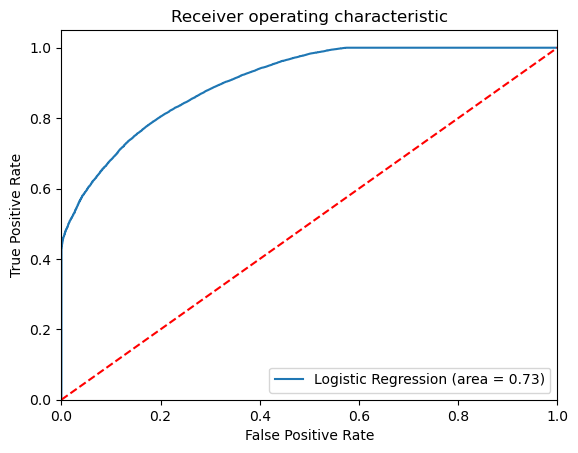

In [345]:
logit_roc_auc = roc_auc_score(y_test,y_pred)
fpr,tpr,thresholds = roc_curve(y_test,model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [347]:
# Oversampling to balance the target variable

sm=SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())


print(f"Before OverSampling, count of label 1: {sum(y_train == 1)}")
print(f"Before OverSampling, count of label 0: {sum(y_train == 0)}")
print('\nAfter OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
print(f"After OverSampling, count of label 1: {sum(y_train_res == 1)}")
print(f"After OverSampling, count of label 0: {sum(y_train_res == 0)}")

Before OverSampling, count of label 1: 243104
Before OverSampling, count of label 0: 59452

After OverSampling, the shape of train_X: (486208, 50)
After OverSampling, the shape of train_y: (486208,) 

After OverSampling, count of label 1: 243104
After OverSampling, count of label 0: 243104


Train Accuracy : 0.8
Train F1 Score: 0.86
Train Recall Score: 0.79
Train Precision Score: 0.94

Test Accuracy : 0.8
Test F1 Score: 0.86
Test Recall Score: 0.79
Test Precision Score: 0.94


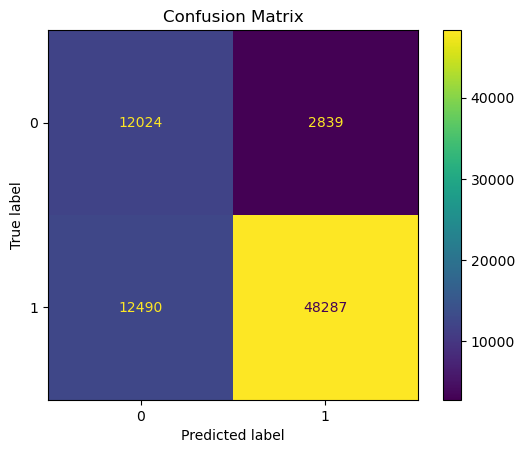

In [351]:
model = LogisticRegression()
model.fit(X_train_res, y_train_res)
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

#Model Evaluation
print('Train Accuracy :',round(model.score(X_train, y_train),2))
print('Train F1 Score:',f1_score(y_train,train_preds).round(2))
print('Train Recall Score:',recall_score(y_train,train_preds).round(2))
print('Train Precision Score:',precision_score(y_train,train_preds).round(2))

print('\nTest Accuracy :', round(model.score(X_test,y_test), 2))
print('Test F1 Score:',f1_score(y_test,test_preds).round(2))
print('Test Recall Score:',recall_score(y_test,test_preds).round(2))
print('Test Precision Score:',precision_score(y_test,test_preds).round(2))

# Confusion Matrix
cm = confusion_matrix(y_test, test_preds)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()


In [357]:
y_pred = test_preds
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.49      0.81      0.61     14863
           1       0.94      0.79      0.86     60777

    accuracy                           0.80     75640
   macro avg       0.72      0.80      0.74     75640
weighted avg       0.86      0.80      0.81     75640



### Regularization: 

In [361]:
lamb = np.arange(0.01, 1000, 10)

train_scores = []
test_scores = []

for lam in lamb:
    model = LogisticRegression(C = 1/lam)
    model.fit(X_train, y_train)
    tr_score = model.score(X_train, y_train)
    te_score = model.score(X_test, y_test)
    
    train_scores.append(tr_score)
    test_scores.append(te_score)


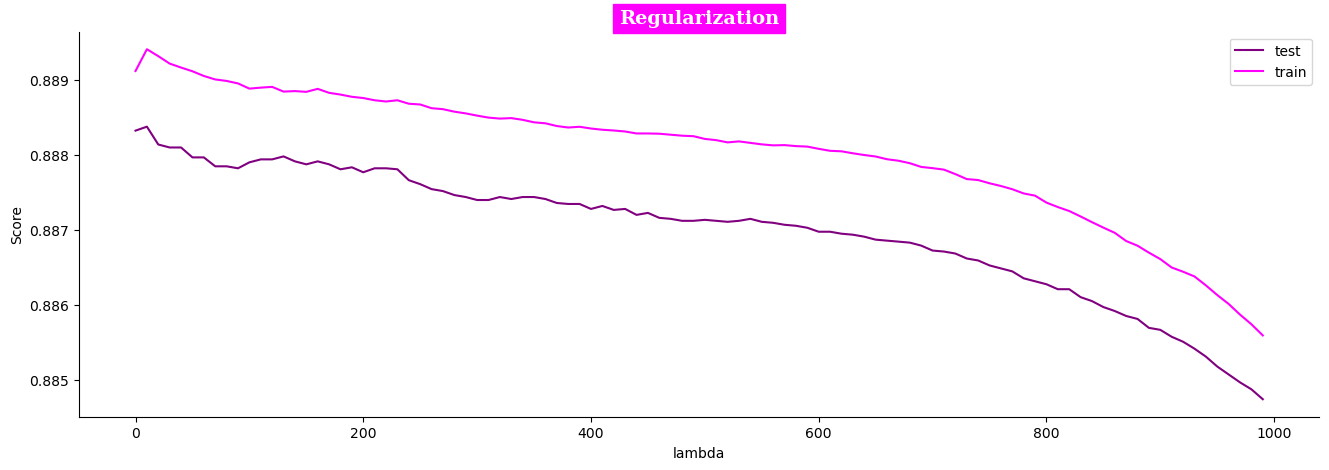

In [362]:
#Plot the train and test scores with respect lambda values i.e. regularization factors
ran = np.arange(0.01, 1000, 10)
plt.figure(figsize=(16,5))
sns.lineplot(x=ran,y=test_scores,color='purple',label='test')
sns.lineplot(x=ran,y=train_scores,color='magenta',label='train')
plt.title('Regularization',fontsize=14, fontfamily='serif', fontweight='bold', backgroundcolor='magenta', color='w')
plt.xlabel("lambda")
plt.ylabel("Score")
sns.despine()
plt.show()

In [363]:
print(np.argmax(test_scores))
print(test_scores[np.argmax(test_scores)])

1
0.8883791644632469


In [364]:
#Calculate the best lambda value based on the index of best test score
best_lamb = 0.01 + (10*2)
best_lamb

20.01

In [365]:
# Fitting the model with best lambda:
reg_model = LogisticRegression(C=1/best_lamb)
reg_model.fit(X_train, y_train)


LogisticRegression(C=0.04997501249375312)

In [366]:
y_reg_pred = reg_model.predict(X_test)
y_reg_pred_proba = reg_model.predict_proba(X_test)


In [367]:
print(f'Logistic Regression Model Score with best lambda: ',end='')
print(round(model.score(X_test, y_test)*100,2),'%')


Logistic Regression Model Score with best lambda: 88.47 %


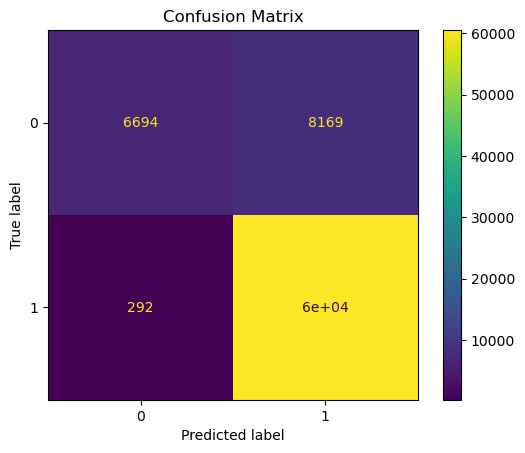

In [369]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_reg_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()


In [380]:
print(classification_report(y_test, y_reg_pred))

              precision    recall  f1-score   support

           0       0.96      0.45      0.61     14863
           1       0.88      1.00      0.93     60777

    accuracy                           0.89     75640
   macro avg       0.92      0.72      0.77     75640
weighted avg       0.90      0.89      0.87     75640



In [383]:

x=scaler.fit_transform(X)
kfold = KFold(n_splits=10)
accuracy = np.mean(cross_val_score(reg_model,x,y,cv=kfold,scoring='accuracy'))
print("Cross Validation accuracy : {:.3f}".format(accuracy))


Cross Validation accuracy : 0.889


In [384]:
cm = confusion_matrix(y_test, y_reg_pred)
cm_df = pd.DataFrame(cm, index=['Defaulter','Fully paid'], columns=['Defaulter','Fully paid'])
cm_df

,Defaulter,Fully paid
Defaulter,6694,8169
Fully paid,292,60485


In [385]:
#Collect the model coefficients and print those in dataframe format
coeff_df = pd.DataFrame()
coeff_df['Features'] = X_train_res.columns
coeff_df['Weights'] = model.coef_[0]
coeff_df['ABS_Weights'] = abs(coeff_df['Weights'])
coeff_df = coeff_df.sort_values(['ABS_Weights'], ascending=False)
coeff_df


,Features,Weights,ABS_Weights
34,zip_code_93700,-2.444353,2.444353
27,zip_code_11650,-2.442943,2.442943
33,zip_code_86630,-2.414872,2.414872
29,zip_code_29597,1.446782,1.446782
26,zip_code_05113,1.442414,1.442414
2,int_rate,-0.769737,0.769737
4,dti,-0.569540,0.569540
1,term,-0.464407,0.464407
3,annual_inc,0.460881,0.460881
38,grade_E,-0.431212,0.431212


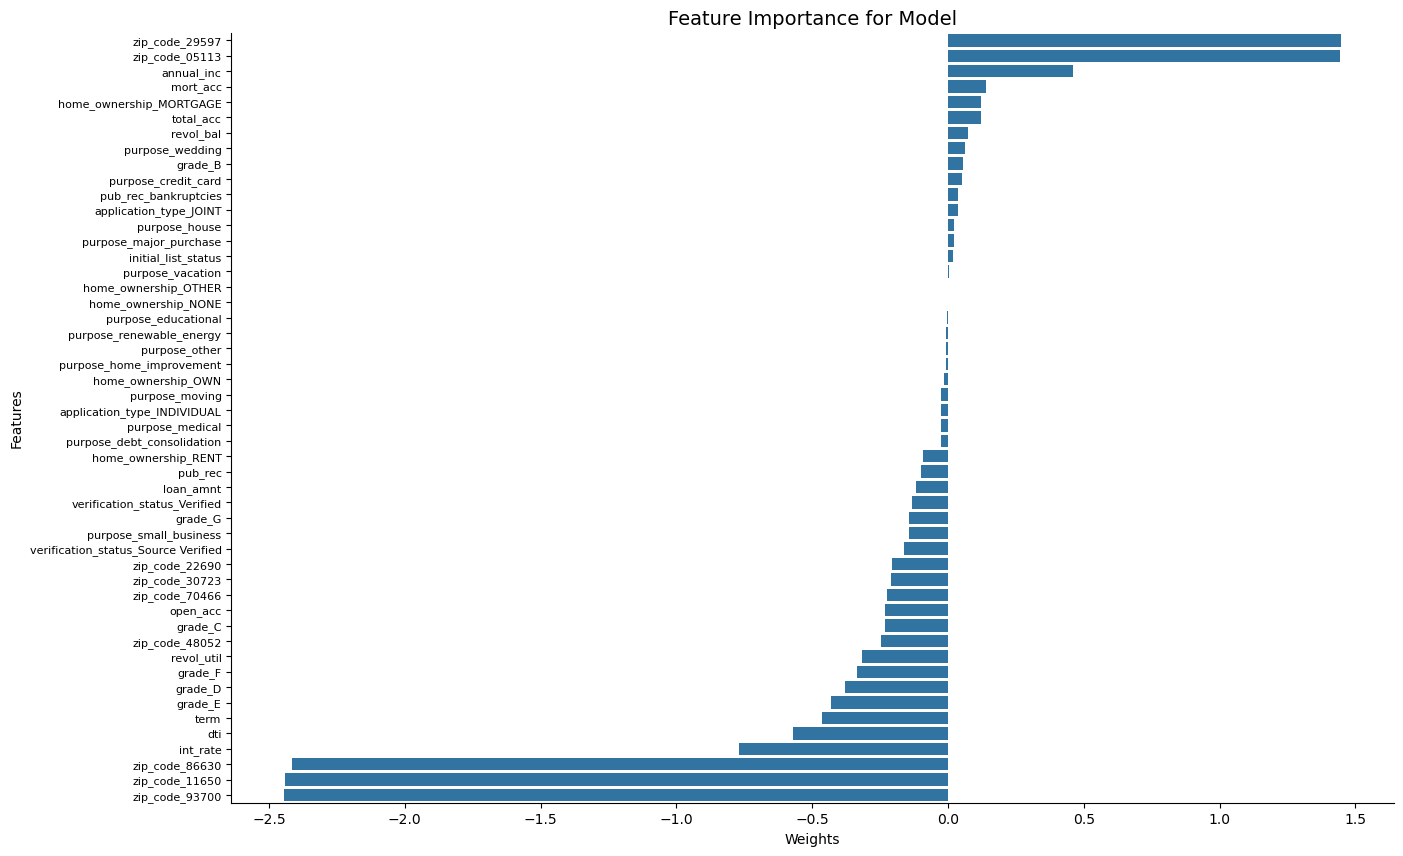

In [393]:
imp_feature = coeff_df.sort_values(by='Weights',ascending=False)
plt.figure(figsize=(15,10))
sns.barplot(y = imp_feature['Features'],
           x = imp_feature['Weights'])
plt.title("Feature Importance for Model",fontsize=14)
plt.xlabel("Weights")
plt.yticks(fontsize=8)
plt.ylabel("Features")
sns.despine()
plt.show()

In [395]:
model.intercept_

array([2.56157213])

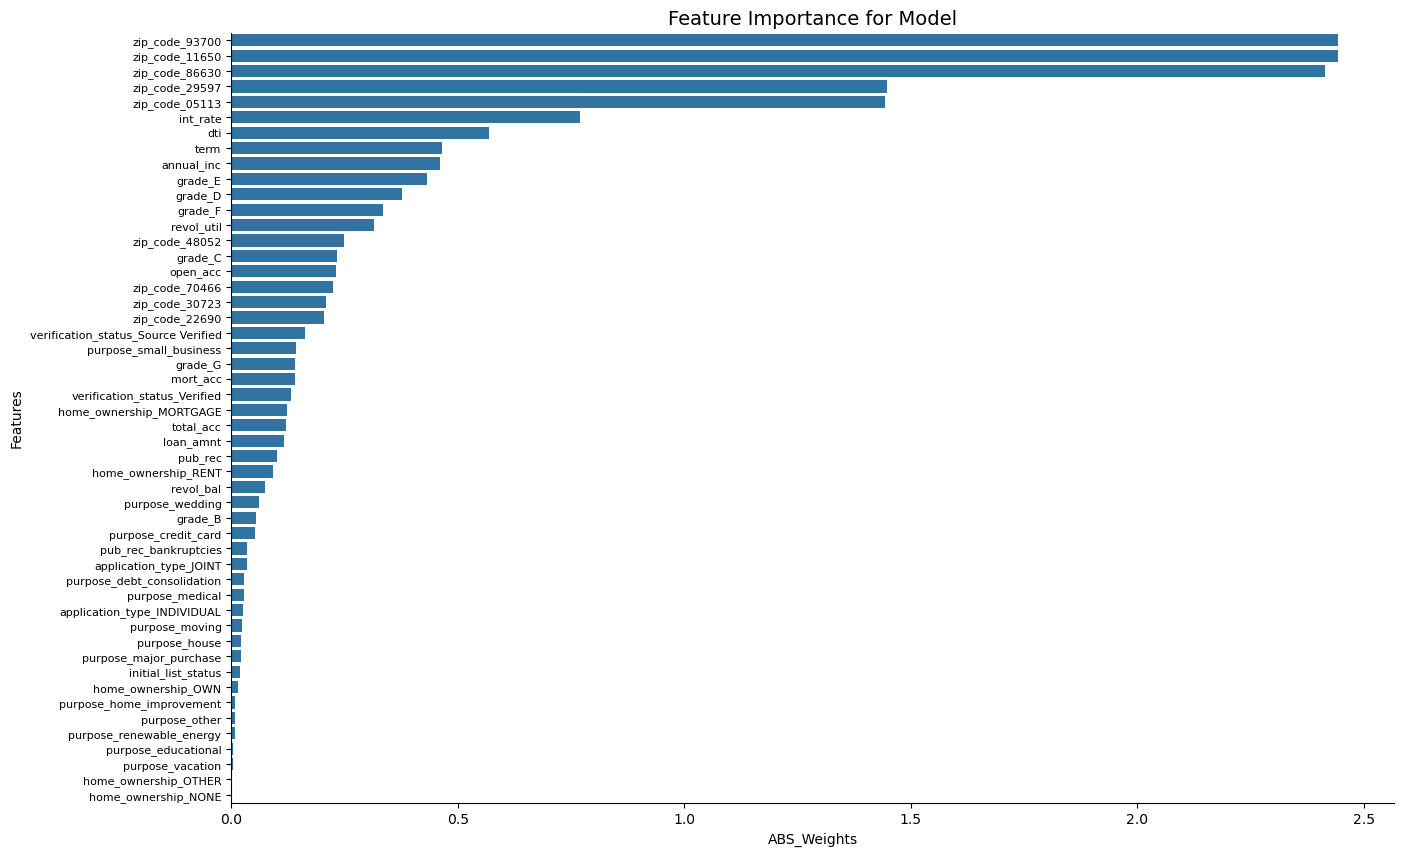

In [399]:
plt.figure(figsize=(15,10))
sns.barplot(y = coeff_df['Features'],x = coeff_df['ABS_Weights'])
plt.title("Feature Importance for Model",fontsize=14)
plt.xlabel("ABS_Weights")
plt.yticks(fontsize=8)
plt.ylabel("Features")
sns.despine()
plt.show()

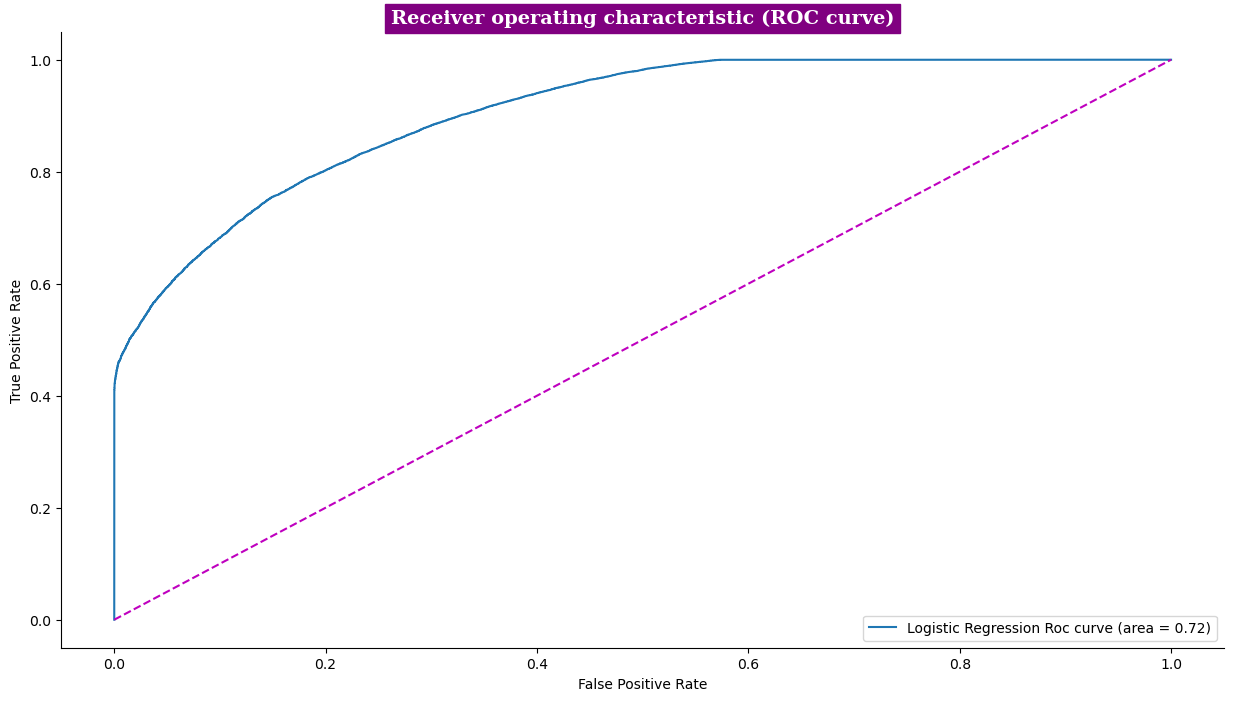

In [405]:
# area under ROC curve
logit_roc_auc = roc_auc_score(y_test,y_reg_pred)

# Compute the false positive rate, true positive rate, and thresholds
fpr,tpr,thresholds = roc_curve(y_test,y_reg_pred_proba[:,1])

# Compute the area under the ROC curve
roc_auc = auc(fpr, tpr)

# plot ROC curve
plt.figure(figsize=(15,8))
plt.plot(fpr,tpr,label='Logistic Regression Roc curve (area = %0.2f)'% logit_roc_auc)
plt.plot([0,1],[0,1],'m--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC curve)',fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor='purple',color='w')
plt.legend(loc="lower right")
sns.despine()
plt.show()

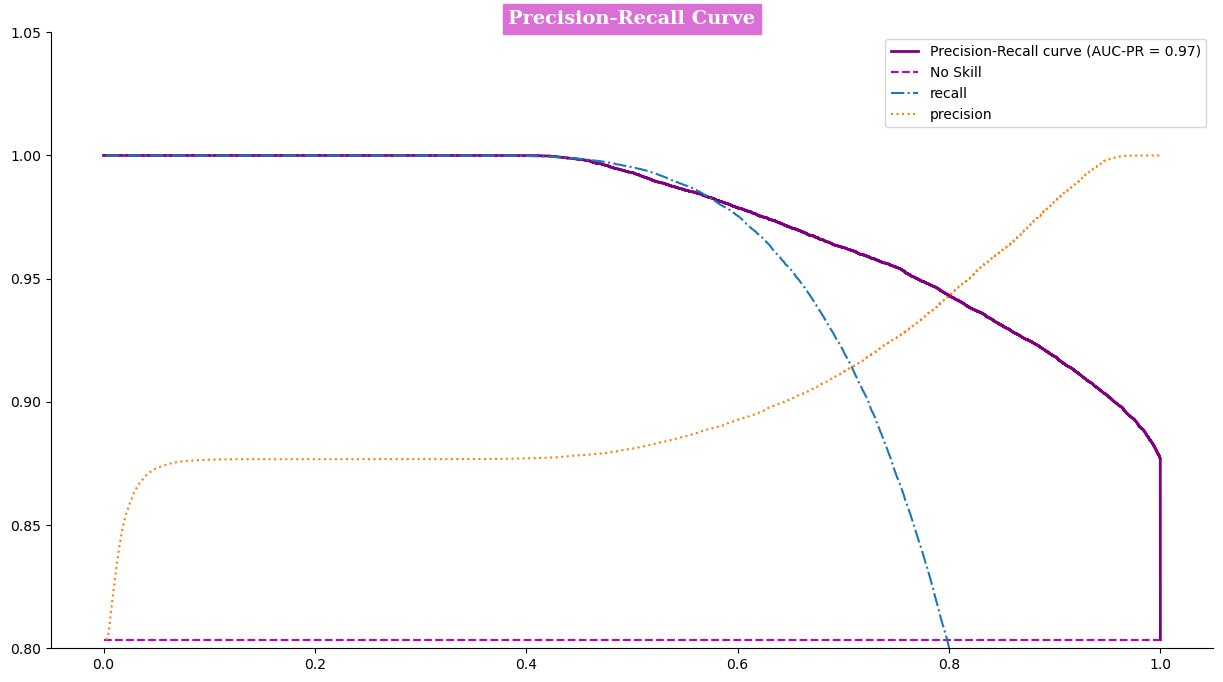

0.974

In [411]:
precision, recall, thresholds = precision_recall_curve(y_test, y_reg_pred_proba[:,1])

average_precision = average_precision_score(y_test, y_reg_pred_proba[:,1])

no_skill = len(y_test[y_test==1]) / len(y_test)

plt.figure(figsize=(15,8))
plt.plot(recall, precision, color='purple', lw=2, label=f'Precision-Recall curve (AUC-PR = {average_precision:.2f})')
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill', color='m')
plt.plot(thresholds, recall[0:thresholds.shape[0]], label='recall',linestyle='-.')
plt.plot(thresholds, precision[0:thresholds.shape[0]], label='precision',linestyle='dotted')
# plt.xlim([0.0, 1.0])
plt.ylim([0.8, 1.05])
plt.title('Precision-Recall Curve',fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor='orchid',color='w')
plt.legend(loc='upper right')
sns.despine()
plt.show()

auc(recall, precision).round(3)

In [413]:
auc(recall, precision).round(3)

0.974

In [416]:
lr = LogisticRegression(max_iter=1000, class_weight='balanced')

lr_model = lr.fit(X_train, y_train)

print(classification_report(y_test, lr_model.predict(X_test)))

cm_bal = confusion_matrix(y_test, lr_model.predict(X_test))
cm_bal_df = pd.DataFrame(cm_bal, index=['Defaulter','Fully paid'], columns=['Defaulter','Fully paid'])
cm_bal_df

              precision    recall  f1-score   support

           0       0.49      0.81      0.61     14863
           1       0.95      0.79      0.86     60777

    accuracy                           0.80     75640
   macro avg       0.72      0.80      0.74     75640
weighted avg       0.86      0.80      0.81     75640



,Defaulter,Fully paid
Defaulter,12064,2799
Fully paid,12544,48233


In [418]:
lr_model.intercept_

array([5.00369263])